## <center> Gaussian Mixture Models </center>

In [1]:
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture


import warnings
warnings.filterwarnings("ignore")

### Data

In [2]:
olivetti = fetch_olivetti_faces()
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   =====================
    Classes    

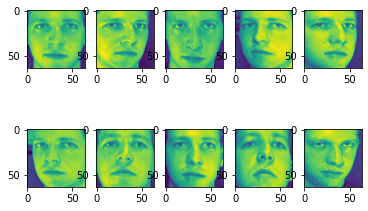

In [3]:
X = olivetti.data # In this case we won't use the target, due to the fact that we are working an unsupervised example

fig, ax = plt.subplots(2,5)

for a in range(2):
    for i in range(5):
        im = X[i + a*5].reshape(64,-1)
        ax[a, i].imshow(im)

### Model

In [4]:
help(GaussianMixture)

Help on class GaussianMixture in module sklearn.mixture._gaussian_mixture:

class GaussianMixture(sklearn.mixture._base.BaseMixture)
 |  GaussianMixture(n_components=1, *, covariance_type='full', tol=0.001, reg_covar=1e-06, max_iter=100, n_init=1, init_params='kmeans', weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10)
 |  
 |  Gaussian Mixture.
 |  
 |  Representation of a Gaussian mixture model probability distribution.
 |  This class allows to estimate the parameters of a Gaussian mixture
 |  distribution.
 |  
 |  Read more in the :ref:`User Guide <gmm>`.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  n_components : int, default=1
 |      The number of mixture components.
 |  
 |  covariance_type : {'full', 'tied', 'diag', 'spherical'}, default='full'
 |      String describing the type of covariance parameters to use.
 |      Must be one of:
 |  
 |      - 'full': each component has 

In [5]:
# In this case as pre-processing a PCA model is used to make the model faster

pca = PCA(0.99) # An explained variance ratio of 99% is chosen
X = pca.fit_transform(X)
pca.n_components_

260

In [6]:
gm = GaussianMixture(
    n_components=10,
    n_init=10,
    covariance_type="full", # Default, but it actually gives each component its own general covariance matrix.  
    init_params="kmeans" # Default, initial points are initialized with kmeans algoritm
    )

gm.fit(X)

GaussianMixture(n_components=10, n_init=10)

In [7]:
# Predicting the probabilities
gm.predict_proba(X[:10])

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

In [8]:
gm.weights_

array([0.1375, 0.1375, 0.0375, 0.135 , 0.0875, 0.1225, 0.11  , 0.0825,
       0.1025, 0.0475])

In [9]:
gm.means_

array([[ 1.27764132e-01, -3.62064324e+00,  1.25749277e+00, ...,
        -4.52957270e-03, -9.57721285e-03, -1.93869839e-03],
       [-2.48202726e+00,  4.74259207e+00,  7.86221174e-01, ...,
         3.99518504e-03,  6.64891817e-03,  6.63950421e-04],
       [ 7.07859543e+00, -7.51757278e-01, -4.01878784e+00, ...,
        -4.78483575e-03,  3.94797263e-03, -8.91494838e-03],
       ...,
       [-2.57160922e+00, -3.65829783e+00, -1.92376844e+00, ...,
        -8.23326845e-03, -3.29491406e-03, -2.56399596e-04],
       [ 1.13046452e-01, -1.16730553e+00, -2.04903702e+00, ...,
        -1.19486050e-03,  8.35218109e-03,  7.31158772e-03],
       [-7.69688517e-01,  3.89360946e+00, -4.13896022e+00, ...,
        -5.26512018e-03, -5.41936033e-03,  1.20099774e-02]])

In [10]:
gm.covariances_

array([[[ 2.34491447e+00, -5.89652801e-01,  6.69165055e-01, ...,
          1.82276154e-03,  6.58690332e-03,  2.00582015e-02],
        [-5.89652801e-01,  4.40813907e+00,  3.62568387e-02, ...,
         -6.88547085e-03,  6.21168342e-03, -2.22852928e-02],
        [ 6.69165055e-01,  3.62568387e-02,  1.27452124e+00, ...,
         -1.98684000e-02,  5.46935819e-03,  3.28009863e-03],
        ...,
        [ 1.82276154e-03, -6.88547085e-03, -1.98684000e-02, ...,
          7.27573997e-03, -1.20051289e-03,  1.23162829e-03],
        [ 6.58690332e-03,  6.21168342e-03,  5.46935819e-03, ...,
         -1.20051289e-03,  8.23531997e-03, -2.43683067e-03],
        [ 2.00582015e-02, -2.22852928e-02,  3.28009863e-03, ...,
          1.23162829e-03, -2.43683067e-03,  7.69046563e-03]],

       [[ 4.52875470e+00, -1.70577430e-01,  1.48079253e-01, ...,
         -2.37635429e-02, -2.88454832e-02,  5.41806477e-03],
        [-1.70577430e-01,  5.05780517e+00, -6.27406331e-01, ...,
         -3.18738966e-02, -5.64755389e

In [11]:
# GMM are generative models, so they can also make samples
n_samples = 10
X_new, y_new = gm.sample(n_samples)
gm.predict(X_new)

array([1, 1, 2, 4, 5, 5, 5, 8, 8, 9], dtype=int64)

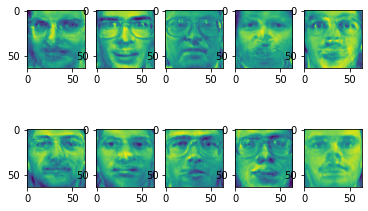

In [12]:
fig, ax = plt.subplots(2,5)
X_resh = pca.inverse_transform(X_new)

for a in range(2):
    for i in range(5):
        im = X_resh[i + a*5].reshape(64,-1)
        ax[a, i].imshow(im)

### Selecting the number of clusters

We cannot use the inertia or the silhouette score because they both assume that the clusters are spherical. Instead, we can try to find the model that minimizes a theoretical information criterion such as the Bayesian Information Criterion (BIC) or the Akaike Information Criterion (AIC):

$$BIC = log(m)p - 2log(\hat{L})$$
$$AIC = 2p - 2log(\hat{L})$$

- $m$ is the number of instances.
- $p$ is the number of parameters learned by the model.
- $\hat{L}$ is the maximized value of the likelihood function of the model. This is the conditional probability of the observed data , given the model and its optimized parameters.


Both BIC and AIC penalize models that have more parameters to learn (e.g., more clusters), and reward models that fit the data well (i.e., models that give a high likelihood to the observed data).

In [13]:
gm.bic(X)

1047705.8688132501

In [14]:
gm.aic(X)

-317011.7830238928

In [15]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 21)]

In [ ]:
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

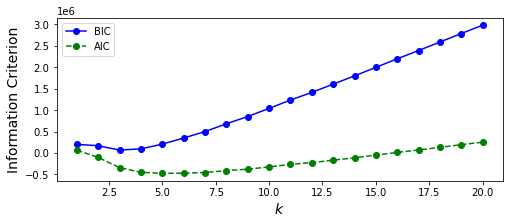

In [ ]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 21), bics, "bo-", label="BIC")
plt.plot(range(1, 21), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)

plt.legend()

plt.show()

In this case it seems that 3 is the best value in which both models tend to decrease